In [91]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.append('../')
import utils
from utils.haiku_scrape import scrape_haiku

import matplotlib.pyplot as plt
import numpy as np

#TF
from tensorflow.keras.preprocessing.text import Tokenizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Haiku bot

### How to enforce stanza structure?
- 3 different rnns, each feeding into the next?

### Several approaches to enforce syllable rule:
1. Let the RNN learn on its own and see if it figures it out automatically 
    - Though syllables as a latent variable has very little hints in written text, this might work better with audio data of haikus
2. Restrict number of output units for each stanza as the max number of words/stanza from the data 
    - Then in output, iterate until syllable count satisfied `(while count_syl(stanza) != 5...`
        - This might not be so computationally expensive depending on number of possibile syllables (check this)      
3. Break data down into phoneme/syllable components and feed that through RNN

### Data cleaning
- Some post titles have a preface, amend this by taking all text after a colon?

### Embeddings
- compare pre trained vs trained
- vis with umap

In [165]:
h_set = scrape_haiku()
h_set.append('Keep this in your mind./Only after the clouds cry,/will the rainbow come') #good haiku but had trailing '/'
len(h_set)

828

[' ', '!', '"', "'", ',', '.', '/', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


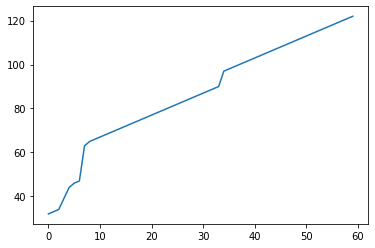

In [154]:
all_s = ''
for i in h_set:
    all_s += i
print(sorted(set(all_s)))
plt.plot(sorted([ord(i) for i in set(all_s)]))

In [7]:
tokenizer = Tokenizer()
l = 'The boiler plate code of this architecture is following'
tokenizer.fit_on_texts(l)
sequences = tokenizer.texts_to_sequences(l)
print(sequences)

[[2], [6], [1], [], [12], [3], [4], [5], [1], [7], [], [13], [5], [9], [2], [1], [], [8], [3], [14], [1], [], [3], [10], [], [2], [6], [4], [11], [], [9], [7], [8], [6], [4], [2], [1], [8], [2], [15], [7], [1], [], [4], [11], [], [10], [3], [5], [5], [3], [16], [4], [17], [18]]


In [141]:
for i in h:
    if ':' in i: 
        print(i)

Error 404: / Your haiku could not be found. / Try again later.
Palindrome: Non mutual life/We owe not in it one woe/We fill autumn on
My 7yr old girl's first haiku: I love my mummy / Way more than the universe / And my daddy too.
The saddest haiku: / when you think it’s your best but / alas, just 1 upvote
Trying to repair / a marriage while heartbroken: / Sisyphean task.
for those gone astray: / even on the darkest nights, / fireflies flicker.
His tight, wet body/Carries me to the bed; I/Whisper, soft: "No homo".


# Emoji removal

In [74]:
x = sorted([ord(i) for i in set(all_s)])
print(x)
chr(8221)

[32, 33, 34, 38, 39, 40, 41, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 94, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 233, 8212, 8217, 8220, 8221, 8230, 9925, 11834, 65039, 65295, 65340, 127843, 127849, 127969, 128520]


'”'

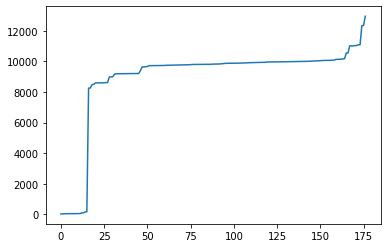

In [103]:
with open('../data/emoji-data.txt','r') as f:
    x = f.read()
x = [i for ix, i in enumerate(x) if x[ix-1] == '(' ]
ords = sorted([ord(i) for i in x])
plt.plot(ords[:177])

In [105]:
np.argmax(np.diff(ords[:177]))

15